# Install TensorFlow GPU Environment

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 458.3 MB 11 kB/s 
     |████████████████████████████████| 462 kB 66.2 MB/s 
     |████████████████████████████████| 5.6 MB 36.2 MB/s 
     |████████████████████████████████| 1.3 MB 68.9 MB/s 
     |████████████████████████████████| 4.3 MB 54.0 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30693 sha256=e76d5ecfb6f2bb26ad6e331092d90a104c146c438f2f3fab4ce84f23888b56a0
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
Successfully built clang
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: 

# Install SMI

In [2]:
!nvidia-smi

Fri Aug 13 15:45:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Importing Library

In [3]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# Configuring Image Size & Train-Test Data

In [4]:
Image_Size = [224,224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Cotton Disease /Dataset/test'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Cotton Disease /Dataset/train'

# VGG16 Model

In [5]:
vgg16 = VGG16(input_shape= Image_Size + [3],weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [6]:
vgg16.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

# As already trained so let's not over-train

In [7]:
for layer in vgg16.layers:
  layer.trainable = False

In [8]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/Cotton Disease /Dataset/train/*')

In [9]:
folders

['/content/drive/MyDrive/Colab Notebooks/Cotton Disease /Dataset/train/fresh cotton leaf',
 '/content/drive/MyDrive/Colab Notebooks/Cotton Disease /Dataset/train/fresh cotton plant',
 '/content/drive/MyDrive/Colab Notebooks/Cotton Disease /Dataset/train/diseased cotton leaf',
 '/content/drive/MyDrive/Colab Notebooks/Cotton Disease /Dataset/train/diseased cotton plant']

In [10]:
len(folders)

4

# Fit the Image Size

In [11]:
x = Flatten()(vgg16.output)

In [12]:
prediction = Dense(len(folders),activation='softmax')(x)

model = Model(inputs=vgg16.input,outputs=prediction)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Cotton Disease /Dataset/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Cotton Disease /Dataset/test',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [18]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 7,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/7
61/61 [==============================] - 870s 14s/step - loss: 0.7015 - accuracy: 0.7406 - val_loss: 0.3294 - val_accuracy: 0.8679
Epoch 2/7
61/61 [==============================] - 608s 10s/step - loss: 0.2625 - accuracy: 0.8985 - val_loss: 0.2035 - val_accuracy: 0.9340
Epoch 3/7
61/61 [==============================] - 615s 10s/step - loss: 0.1716 - accuracy: 0.9359 - val_loss: 0.1472 - val_accuracy: 0.9528
Epoch 4/7
61/61 [==============================] - 621s 10s/step - loss: 0.1487 - accuracy: 0.9462 - val_loss: 0.1399 - val_accuracy: 0.9434
Epoch 5/7
61/61 [==============================] - 614s 10s/step - loss: 0.1094 - accuracy: 0.9636 - val_loss: 0.1126 - val_accuracy: 0.9623
Epoch 6/7
61/61 [==============================] - 594s 10s/step - loss: 0.0878 - accuracy: 0.9749 - val_loss: 0.1246 - val_accuracy: 0.9434
Epoch 7/7
61/61 [==============================] - 594s 10s/step - loss: 0.0843 - accuracy: 0.9739 - val_loss: 0.1203 - val_accuracy: 0.9434


# Ploting the data

In [19]:
import matplotlib.pyplot as plt

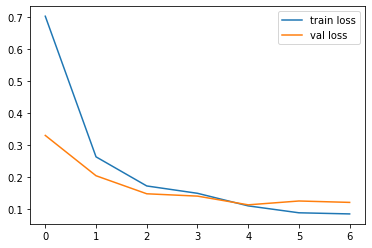

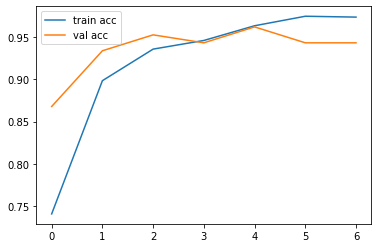

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Saving the model

In [21]:
from tensorflow.keras.models import load_model
model.save('model_vgg16.h5')